In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

In [342]:
start_data = pd.read_csv('train.csv')
start_data

Product_Identifier Supermarket_Identifier Product_Supermarket_Identifier  \
0                 DRB24            CHUKWUDI017              DRB24_CHUKWUDI017   
1                 FDR31            CHUKWUDI019              FDR31_CHUKWUDI019   
2                 FDP16            CHUKWUDI017              FDP16_CHUKWUDI017   
3                 FDY16            CHUKWUDI027              FDY16_CHUKWUDI027   
4                 FDY48            CHUKWUDI046              FDY48_CHUKWUDI046   
...                 ...                    ...                            ...   
3737              FDK10            CHUKWUDI017              FDK10_CHUKWUDI017   
3738              DRC27            CHUKWUDI045              DRC27_CHUKWUDI045   
3739              FDW57            CHUKWUDI046              FDW57_CHUKWUDI046   
3740              NCF30            CHUKWUDI018              NCF30_CHUKWUDI018   
3741              FDS49            CHUKWUDI013              FDS49_CHUKWUDI013   

      Product_Weight Product_Fat_Content  Product_Shelf_Visibility  \
0              8.785             Low Fat                  0.020694   
1                NaN          Normal Fat                  0.086078   
2             18.600             Low Fat                  0.039517   
3                NaN          Normal Fat                  0.091780   
4             14.000             Low Fat                  0.023735   
...              ...                 ...                       ...   
3737           5.785          Normal Fat                  0.040587   
3738          13.800             Low Fat                  0.058220   
3739           8.310          Normal Fat                  0.000000   
3740          17.000             Low Fat                  0.126758   
3741           9.000             Low Fat                  0.079279   

               Product_Type  Product_Price  Supermarket_Opening_Year  \
0               Soft Drinks         382.91                      2014   
1     Fruits and Vegetables         359.53                      1992   
2              Frozen Foods         609.20                      2014   
3              Frozen Foods         456.32                      1992   
4              Baking Goods         258.08                      2004   
...                     ...            ...                       ...   
3737            Snack Foods         450.92                      2014   
3738                  Dairy         618.70                      2009   
3739            Snack Foods         443.51                      2004   
3740              Household         311.34                      2016   
3741                 Canned         193.16                      1994   

     Supermarket _Size Supermarket_Location_Type   Supermarket_Type  \
0                  NaN                 Cluster 2  Supermarket Type1   
1                Small                 Cluster 1      Grocery Store   
2                  NaN                 Cluster 2  Supermarket Type1   
3               Medium                 Cluster 3  Supermarket Type3   
4                Small                 Cluster 1  Supermarket Type1   
...                ...                       ...                ...   
3737               NaN                 Cluster 2  Supermarket Type1   
3738               NaN                 Cluster 2  Supermarket Type1   
3739             Small                 Cluster 1  Supermarket Type1   
3740            Medium                 Cluster 3  Supermarket Type2   
3741              High                 Cluster 3  Supermarket Type1   

      Product_Supermarket_Sales  
0                       4633.97  
1                        729.05  
2                      14740.81  
3                      16137.33  
4                       4613.99  
...                         ...  
3737                    3145.91  
3738                    3685.20  
3739                    9740.65  
3740                    2831.31  
3741                    3338.99  

[3742 rows x 13 columns]

In [343]:
start_data.describe(include="all") #this to include non-numerical features

Product_Identifier Supermarket_Identifier  \
count                3742                   3742   
unique               1367                     10   
top                 NCL31            CHUKWUDI017   
freq                    9                    461   
mean                  NaN                    NaN   
std                   NaN                    NaN   
min                   NaN                    NaN   
25%                   NaN                    NaN   
50%                   NaN                    NaN   
75%                   NaN                    NaN   
max                   NaN                    NaN   

       Product_Supermarket_Identifier  Product_Weight Product_Fat_Content  \
count                            3742     3141.000000                3742   
unique                           3742             NaN                   3   
top                 DRD15_CHUKWUDI019             NaN             Low Fat   
freq                                1             NaN                2272   
mean                              NaN       12.870640                 NaN   
std                               NaN        4.730432                 NaN   
min                               NaN        4.555000                 NaN   
25%                               NaN        8.630000                 NaN   
50%                               NaN       12.600000                 NaN   
75%                               NaN       17.100000                 NaN   
max                               NaN       21.350000                 NaN   

        Product_Shelf_Visibility Product_Type  Product_Price  \
count                3742.000000         3742    3742.000000   
unique                       NaN           16            NaN   
top                          NaN  Snack Foods            NaN   
freq                         NaN          563            NaN   
mean                    0.066613          NaN     391.815315   
std                     0.052951          NaN     120.204222   
min                     0.000000          NaN      78.730000   
25%                     0.026971          NaN     308.392500   
50%                     0.053517          NaN     393.910000   
75%                     0.095094          NaN     466.480000   
max                     0.328391          NaN     667.220000   

        Supermarket_Opening_Year Supermarket _Size Supermarket_Location_Type  \
count                3742.000000              2616                      3742   
unique                       NaN                 3                         3   
top                          NaN            Medium                 Cluster 3   
freq                         NaN              1155                      1438   
mean                 2004.778461               NaN                       NaN   
std                     8.276712               NaN                       NaN   
min                  1992.000000               NaN                       NaN   
25%                  1994.000000               NaN                       NaN   
50%                  2006.000000               NaN                       NaN   
75%                  2011.000000               NaN                       NaN   
max                  2016.000000               NaN                       NaN   

         Supermarket_Type  Product_Supermarket_Sales  
count                3742                3742.000000  
unique                  4                        NaN  
top     Supermarket Type1                        NaN  
freq                 2495                        NaN  
mean                  NaN                6103.735353  
std                   NaN                4456.169125  
min                   NaN                  83.230000  
25%                   NaN                2728.120000  
50%                   NaN                5374.675000  
75%                   NaN                8524.737500  
max                   NaN               28612.760000

### Dealing with missing value

In [344]:
start_data.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     601
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1126
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

In [268]:
#replacing null values of 'Product_Weight' with their values of corresponding means of 'Product_Fat_Content'
low_fat = first_data['Product_Fat_Content'] == 'Low Fat'
normal_fat = first_data['Product_Fat_Content'] == 'Normal Fat'
ultra_low_fat = first_data['Product_Fat_Content'] == 'Ultra Low fat'

first_data.loc[low_fat, 'Product_Weight'] = first_data.loc[low_fat, 'Product_Weight'].fillna(first_data.loc[low_fat, 'Product_Weight'].mean())
first_data.loc[normal_fat, 'Product_Weight'] = first_data.loc[normal_fat, 'Product_Weight'].fillna(first_data.loc[normal_fat, 'Product_Weight'].mean())
first_data.loc[ultra_low_fat, 'Product_Weight'] = first_data.loc[ultra_low_fat, 'Product_Weight'].fillna(first_data.loc[ultra_low_fat, 'Product_Weight'].mean())

In [269]:
first_data.describe(include='all')

Product_Identifier Supermarket_Identifier  \
count                3742                   3742   
unique               1367                     10   
top                 NCL31            CHUKWUDI017   
freq                    9                    461   
mean                  NaN                    NaN   
std                   NaN                    NaN   
min                   NaN                    NaN   
25%                   NaN                    NaN   
50%                   NaN                    NaN   
75%                   NaN                    NaN   
max                   NaN                    NaN   

       Product_Supermarket_Identifier  Product_Weight Product_Fat_Content  \
count                            3742     3742.000000                3742   
unique                           3742             NaN                   3   
top                 DRD15_CHUKWUDI019             NaN             Low Fat   
freq                                1             NaN                2272   
mean                              NaN       12.870055                 NaN   
std                               NaN        4.334443                 NaN   
min                               NaN        4.555000                 NaN   
25%                               NaN        9.288750                 NaN   
50%                               NaN       12.850000                 NaN   
75%                               NaN       16.350000                 NaN   
max                               NaN       21.350000                 NaN   

        Product_Shelf_Visibility Product_Type  Product_Price  \
count                3742.000000         3742    3742.000000   
unique                       NaN           16            NaN   
top                          NaN  Snack Foods            NaN   
freq                         NaN          563            NaN   
mean                    0.066613          NaN     391.815315   
std                     0.052951          NaN     120.204222   
min                     0.000000          NaN      78.730000   
25%                     0.026971          NaN     308.392500   
50%                     0.053517          NaN     393.910000   
75%                     0.095094          NaN     466.480000   
max                     0.328391          NaN     667.220000   

        Supermarket_Opening_Year Supermarket _Size Supermarket_Location_Type  \
count                3742.000000              2616                      3742   
unique                       NaN                 3                         3   
top                          NaN            Medium                 Cluster 3   
freq                         NaN              1155                      1438   
mean                 2004.778461               NaN                       NaN   
std                     8.276712               NaN                       NaN   
min                  1992.000000               NaN                       NaN   
25%                  1994.000000               NaN                       NaN   
50%                  2006.000000               NaN                       NaN   
75%                  2011.000000               NaN                       NaN   
max                  2016.000000               NaN                       NaN   

         Supermarket_Type  Product_Supermarket_Sales  
count                3742                3742.000000  
unique                  4                        NaN  
top     Supermarket Type1                        NaN  
freq                 2495                        NaN  
mean                  NaN                6103.735353  
std                   NaN                4456.169125  
min                   NaN                  83.230000  
25%                   NaN                2728.120000  
50%                   NaN                5374.675000  
75%                   NaN                8524.737500  
max                   NaN               28612.760000

In [270]:
first_data.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                       0
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket _Size                 1126
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

In [345]:
start_data['Product_Weight'].fillna(np.mean(start_data['Product_Weight']),inplace = True)
start_data.describe(include='all')

Product_Identifier Supermarket_Identifier  \
count                3742                   3742   
unique               1367                     10   
top                 NCL31            CHUKWUDI017   
freq                    9                    461   
mean                  NaN                    NaN   
std                   NaN                    NaN   
min                   NaN                    NaN   
25%                   NaN                    NaN   
50%                   NaN                    NaN   
75%                   NaN                    NaN   
max                   NaN                    NaN   

       Product_Supermarket_Identifier  Product_Weight Product_Fat_Content  \
count                            3742     3742.000000                3742   
unique                           3742             NaN                   3   
top                 DRD15_CHUKWUDI019             NaN             Low Fat   
freq                                1             NaN                2272   
mean                              NaN       12.870640                 NaN   
std                               NaN        4.333829                 NaN   
min                               NaN        4.555000                 NaN   
25%                               NaN        9.288750                 NaN   
50%                               NaN       12.870640                 NaN   
75%                               NaN       16.350000                 NaN   
max                               NaN       21.350000                 NaN   

        Product_Shelf_Visibility Product_Type  Product_Price  \
count                3742.000000         3742    3742.000000   
unique                       NaN           16            NaN   
top                          NaN  Snack Foods            NaN   
freq                         NaN          563            NaN   
mean                    0.066613          NaN     391.815315   
std                     0.052951          NaN     120.204222   
min                     0.000000          NaN      78.730000   
25%                     0.026971          NaN     308.392500   
50%                     0.053517          NaN     393.910000   
75%                     0.095094          NaN     466.480000   
max                     0.328391          NaN     667.220000   

        Supermarket_Opening_Year Supermarket _Size Supermarket_Location_Type  \
count                3742.000000              2616                      3742   
unique                       NaN                 3                         3   
top                          NaN            Medium                 Cluster 3   
freq                         NaN              1155                      1438   
mean                 2004.778461               NaN                       NaN   
std                     8.276712               NaN                       NaN   
min                  1992.000000               NaN                       NaN   
25%                  1994.000000               NaN                       NaN   
50%                  2006.000000               NaN                       NaN   
75%                  2011.000000               NaN                       NaN   
max                  2016.000000               NaN                       NaN   

         Supermarket_Type  Product_Supermarket_Sales  
count                3742                3742.000000  
unique                  4                        NaN  
top     Supermarket Type1                        NaN  
freq                 2495                        NaN  
mean                  NaN                6103.735353  
std                   NaN                4456.169125  
min                   NaN                  83.230000  
25%                   NaN                2728.120000  
50%                   NaN                5374.675000  
75%                   NaN                8524.737500  
max                   NaN               28612.760000

In [346]:
start_data['Supermarket _Size'].fillna("Medium",inplace = True)
start_data.describe(include='all')

Product_Identifier Supermarket_Identifier  \
count                3742                   3742   
unique               1367                     10   
top                 NCL31            CHUKWUDI017   
freq                    9                    461   
mean                  NaN                    NaN   
std                   NaN                    NaN   
min                   NaN                    NaN   
25%                   NaN                    NaN   
50%                   NaN                    NaN   
75%                   NaN                    NaN   
max                   NaN                    NaN   

       Product_Supermarket_Identifier  Product_Weight Product_Fat_Content  \
count                            3742     3742.000000                3742   
unique                           3742             NaN                   3   
top                 DRD15_CHUKWUDI019             NaN             Low Fat   
freq                                1             NaN                2272   
mean                              NaN       12.870640                 NaN   
std                               NaN        4.333829                 NaN   
min                               NaN        4.555000                 NaN   
25%                               NaN        9.288750                 NaN   
50%                               NaN       12.870640                 NaN   
75%                               NaN       16.350000                 NaN   
max                               NaN       21.350000                 NaN   

        Product_Shelf_Visibility Product_Type  Product_Price  \
count                3742.000000         3742    3742.000000   
unique                       NaN           16            NaN   
top                          NaN  Snack Foods            NaN   
freq                         NaN          563            NaN   
mean                    0.066613          NaN     391.815315   
std                     0.052951          NaN     120.204222   
min                     0.000000          NaN      78.730000   
25%                     0.026971          NaN     308.392500   
50%                     0.053517          NaN     393.910000   
75%                     0.095094          NaN     466.480000   
max                     0.328391          NaN     667.220000   

        Supermarket_Opening_Year Supermarket _Size Supermarket_Location_Type  \
count                3742.000000              3742                      3742   
unique                       NaN                 3                         3   
top                          NaN            Medium                 Cluster 3   
freq                         NaN              2281                      1438   
mean                 2004.778461               NaN                       NaN   
std                     8.276712               NaN                       NaN   
min                  1992.000000               NaN                       NaN   
25%                  1994.000000               NaN                       NaN   
50%                  2006.000000               NaN                       NaN   
75%                  2011.000000               NaN                       NaN   
max                  2016.000000               NaN                       NaN   

         Supermarket_Type  Product_Supermarket_Sales  
count                3742                3742.000000  
unique                  4                        NaN  
top     Supermarket Type1                        NaN  
freq                 2495                        NaN  
mean                  NaN                6103.735353  
std                   NaN                4456.169125  
min                   NaN                  83.230000  
25%                   NaN                2728.120000  
50%                   NaN                5374.675000  
75%                   NaN                8524.737500  
max                   NaN               28612.760000

### Determining features of interest

In [347]:
real_data = start_data.drop(['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier'],axis=1)

In [273]:
real_data.describe() #numerical features only (for now) to explore the PDFs

Product_Weight  Product_Shelf_Visibility  Product_Price  \
count     3742.000000               3742.000000    3742.000000   
mean        12.870055                  0.066613     391.815315   
std          4.334443                  0.052951     120.204222   
min          4.555000                  0.000000      78.730000   
25%          9.288750                  0.026971     308.392500   
50%         12.850000                  0.053517     393.910000   
75%         16.350000                  0.095094     466.480000   
max         21.350000                  0.328391     667.220000   

       Supermarket_Opening_Year  Product_Supermarket_Sales  
count               3742.000000                3742.000000  
mean                2004.778461                6103.735353  
std                    8.276712                4456.169125  
min                 1992.000000                  83.230000  
25%                 1994.000000                2728.120000  
50%                 2006.000000                5374.675000  
75%                 2011.000000                8524.737500  
max                 2016.000000               28612.760000

### Exploring the PDFs and dealing with outliers

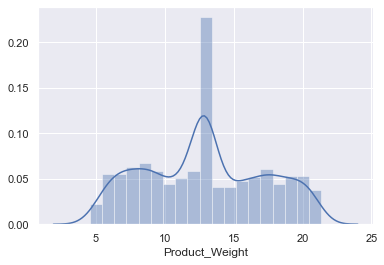

In [274]:
sns.distplot(real_data['Product_Weight']) #This is normally distributed, it is left

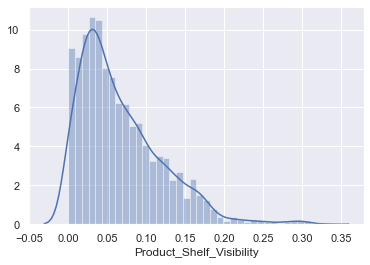

In [275]:
sns.distplot(real_data['Product_Shelf_Visibility']) 

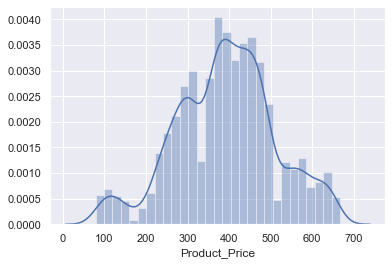

In [276]:
sns.distplot(real_data['Product_Price'])

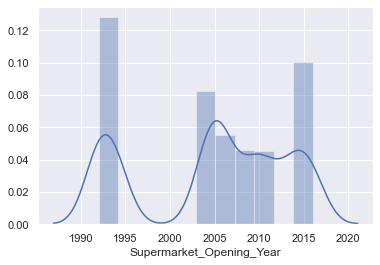

In [118]:
sns.distplot(real_data['Supermarket_Opening_Year'])

## Checking the OLS assumptions

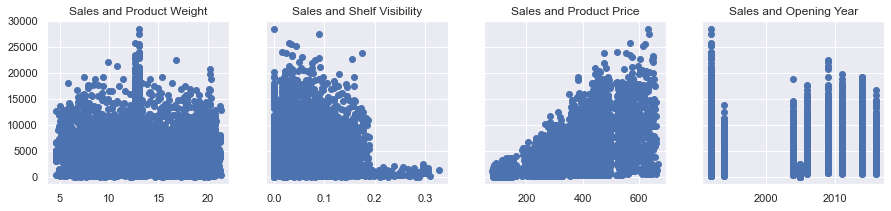

In [277]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) 
#sharey -> share 'Product_Supermarket_Sales' as y
ax1.scatter(real_data['Product_Weight'],real_data['Product_Supermarket_Sales'])
ax1.set_title('Sales and Product Weight')
ax2.scatter(real_data['Product_Shelf_Visibility'],real_data['Product_Supermarket_Sales'])
ax2.set_title('Sales and Shelf Visibility')
ax3.scatter(real_data['Product_Price'],real_data['Product_Supermarket_Sales'])
ax3.set_title('Sales and Product Price')
ax4.scatter(real_data['Supermarket_Opening_Year'],real_data['Product_Supermarket_Sales'])
ax4.set_title('Sales and Opening Year')
plt.show()

## No need for log transformation (after testing)

### Relaxing the assumption

In [348]:
# Let's transform 'Sales' with a log transformation
log_sales = np.log(real_data['Product_Supermarket_Sales'])

# Then we add it to our data frame
real_data['log_sales'] = log_sales
real_data

Product_Weight Product_Fat_Content  Product_Shelf_Visibility  \
0            8.78500             Low Fat                  0.020694   
1           12.87064          Normal Fat                  0.086078   
2           18.60000             Low Fat                  0.039517   
3           12.87064          Normal Fat                  0.091780   
4           14.00000             Low Fat                  0.023735   
...              ...                 ...                       ...   
3737         5.78500          Normal Fat                  0.040587   
3738        13.80000             Low Fat                  0.058220   
3739         8.31000          Normal Fat                  0.000000   
3740        17.00000             Low Fat                  0.126758   
3741         9.00000             Low Fat                  0.079279   

               Product_Type  Product_Price  Supermarket_Opening_Year  \
0               Soft Drinks         382.91                      2014   
1     Fruits and Vegetables         359.53                      1992   
2              Frozen Foods         609.20                      2014   
3              Frozen Foods         456.32                      1992   
4              Baking Goods         258.08                      2004   
...                     ...            ...                       ...   
3737            Snack Foods         450.92                      2014   
3738                  Dairy         618.70                      2009   
3739            Snack Foods         443.51                      2004   
3740              Household         311.34                      2016   
3741                 Canned         193.16                      1994   

     Supermarket _Size Supermarket_Location_Type   Supermarket_Type  \
0               Medium                 Cluster 2  Supermarket Type1   
1                Small                 Cluster 1      Grocery Store   
2               Medium                 Cluster 2  Supermarket Type1   
3               Medium                 Cluster 3  Supermarket Type3   
4                Small                 Cluster 1  Supermarket Type1   
...                ...                       ...                ...   
3737            Medium                 Cluster 2  Supermarket Type1   
3738            Medium                 Cluster 2  Supermarket Type1   
3739             Small                 Cluster 1  Supermarket Type1   
3740            Medium                 Cluster 3  Supermarket Type2   
3741              High                 Cluster 3  Supermarket Type1   

      Product_Supermarket_Sales  log_sales  
0                       4633.97   8.441169  
1                        729.05   6.591742  
2                      14740.81   9.598375  
3                      16137.33   9.688891  
4                       4613.99   8.436848  
...                         ...        ...  
3737                    3145.91   8.053858  
3738                    3685.20   8.212080  
3739                    9740.65   9.184063  
3740                    2831.31   7.948495  
3741                    3338.99   8.113424  

[3742 rows x 11 columns]

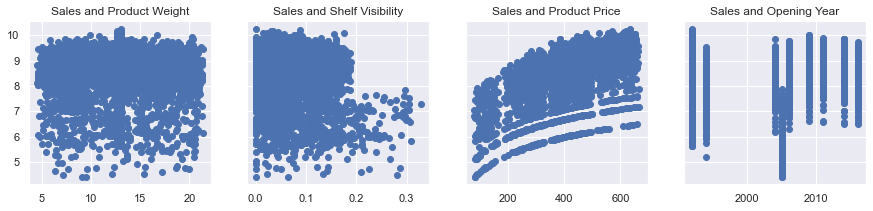

In [280]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) 
#sharey -> share 'Product_Supermarket_Sales' as y
ax1.scatter(real_data['Product_Weight'],real_data['log_sales'])
ax1.set_title('Sales and Product Weight')
ax2.scatter(real_data['Product_Shelf_Visibility'],real_data['log_sales'])
ax2.set_title('Sales and Shelf Visibility')
ax3.scatter(real_data['Product_Price'],real_data['log_sales'])
ax3.set_title('Sales and Product Price')
ax4.scatter(real_data['Supermarket_Opening_Year'],real_data['log_sales'])
ax4.set_title('Sales and Opening Year')
plt.show()

### Check for multicollinearity

In [170]:
real_data.describe()

Product_Weight  Product_Shelf_Visibility  Product_Price  \
count     3742.000000               3742.000000    3742.000000   
mean        12.870640                  0.066613     391.815315   
std          4.333829                  0.052951     120.204222   
min          4.555000                  0.000000      78.730000   
25%          9.288750                  0.026971     308.392500   
50%         12.870640                  0.053517     393.910000   
75%         16.350000                  0.095094     466.480000   
max         21.350000                  0.328391     667.220000   

       Supermarket_Opening_Year  Supermarket_Type  Product_Supermarket_Sales  \
count               3742.000000       3742.000000                3742.000000   
mean                2004.778461          1.135489                6103.735353   
std                    8.276712          0.769699                4456.169125   
min                 1992.000000          0.000000                  83.230000   
25%                 1994.000000          1.000000                2728.120000   
50%                 2006.000000          1.000000                5374.675000   
75%                 2011.000000          1.000000                8524.737500   
max                 2016.000000          3.000000               28612.760000   

         log_sales  
count  3742.000000  
mean      8.336085  
std       1.036164  
min       4.421608  
25%       7.911368  
50%       8.589453  
75%       9.050727  
max      10.261608

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = real_data_dropped[['Product_Weight','Product_Shelf_Visibility','Product_Price', 'Supermarket_Opening_Year','Supermarket_Type']]

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [284]:
vif

Empty DataFrame
Columns: []
Index: []

In [352]:
data_no_multicollinearity = real_data_dropped.drop(['Supermarket_Opening_Year'],axis=1)

In [353]:
data_no_multicollinearity.head(10)

Product_Weight Product_Fat_Content  Product_Shelf_Visibility  \
0         8.78500             Low Fat                  0.020694   
1        12.87064          Normal Fat                  0.086078   
2        18.60000             Low Fat                  0.039517   
3        12.87064          Normal Fat                  0.091780   
4        14.00000             Low Fat                  0.023735   
5        11.65000       Ultra Low fat                  0.033858   
6        14.15000             Low Fat                  0.000000   
7        12.87064             Low Fat                  0.040521   
8         6.21500             Low Fat                  0.012139   
9        12.87064             Low Fat                  0.009715   

            Product_Type  Product_Price Supermarket _Size  \
0            Soft Drinks         382.91            Medium   
1  Fruits and Vegetables         359.53             Small   
2           Frozen Foods         609.20            Medium   
3           Frozen Foods         456.32            Medium   
4           Baking Goods         258.08             Small   
5                Seafood         283.47             Small   
6                 Canned         634.25            Medium   
7                 Others         384.84             Small   
8  Fruits and Vegetables          98.21              High   
9           Frozen Foods         300.10             Small   

  Supermarket_Location_Type   Supermarket_Type  log_sales  
0                 Cluster 2  Supermarket Type1   8.441169  
1                 Cluster 1      Grocery Store   6.591742  
2                 Cluster 2  Supermarket Type1   9.598375  
3                 Cluster 3  Supermarket Type3   9.688891  
4                 Cluster 1  Supermarket Type1   8.436848  
5                 Cluster 1  Supermarket Type1   8.780818  
6                 Cluster 2  Supermarket Type1   9.593054  
7                 Cluster 1      Grocery Store   5.947617  
8                 Cluster 3  Supermarket Type1   7.173935  
9                 Cluster 1      Grocery Store   7.105302

## Create Dummy Variables

In [287]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [354]:
data_no_multicollinearity['Supermarket_Type'] = labelencoder.fit_transform(data_no_multicollinearity['Supermarket_Type'])
data_no_multicollinearity

Product_Weight Product_Fat_Content  Product_Shelf_Visibility  \
0            8.78500             Low Fat                  0.020694   
1           12.87064          Normal Fat                  0.086078   
2           18.60000             Low Fat                  0.039517   
3           12.87064          Normal Fat                  0.091780   
4           14.00000             Low Fat                  0.023735   
...              ...                 ...                       ...   
3737         5.78500          Normal Fat                  0.040587   
3738        13.80000             Low Fat                  0.058220   
3739         8.31000          Normal Fat                  0.000000   
3740        17.00000             Low Fat                  0.126758   
3741         9.00000             Low Fat                  0.079279   

               Product_Type  Product_Price Supermarket _Size  \
0               Soft Drinks         382.91            Medium   
1     Fruits and Vegetables         359.53             Small   
2              Frozen Foods         609.20            Medium   
3              Frozen Foods         456.32            Medium   
4              Baking Goods         258.08             Small   
...                     ...            ...               ...   
3737            Snack Foods         450.92            Medium   
3738                  Dairy         618.70            Medium   
3739            Snack Foods         443.51             Small   
3740              Household         311.34            Medium   
3741                 Canned         193.16              High   

     Supermarket_Location_Type  Supermarket_Type  log_sales  
0                    Cluster 2                 1   8.441169  
1                    Cluster 1                 0   6.591742  
2                    Cluster 2                 1   9.598375  
3                    Cluster 3                 3   9.688891  
4                    Cluster 1                 1   8.436848  
...                        ...               ...        ...  
3737                 Cluster 2                 1   8.053858  
3738                 Cluster 2                 1   8.212080  
3739                 Cluster 1                 1   9.184063  
3740                 Cluster 3                 2   7.948495  
3741                 Cluster 3                 1   8.113424  

[3742 rows x 9 columns]

In [351]:
real_data_dropped = real_data.drop(['Product_Supermarket_Sales'],axis=1)
real_data_dropped.head()

Product_Weight Product_Fat_Content  Product_Shelf_Visibility  \
0         8.78500             Low Fat                  0.020694   
1        12.87064          Normal Fat                  0.086078   
2        18.60000             Low Fat                  0.039517   
3        12.87064          Normal Fat                  0.091780   
4        14.00000             Low Fat                  0.023735   

            Product_Type  Product_Price  Supermarket_Opening_Year  \
0            Soft Drinks         382.91                      2014   
1  Fruits and Vegetables         359.53                      1992   
2           Frozen Foods         609.20                      2014   
3           Frozen Foods         456.32                      1992   
4           Baking Goods         258.08                      2004   

  Supermarket _Size Supermarket_Location_Type   Supermarket_Type  log_sales  
0            Medium                 Cluster 2  Supermarket Type1   8.441169  
1             Small                 Cluster 1      Grocery Store   6.591742  
2            Medium                 Cluster 2  Supermarket Type1   9.598375  
3            Medium                 Cluster 3  Supermarket Type3   9.688891  
4             Small                 Cluster 1  Supermarket Type1   8.436848

In [355]:
real_data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
real_data_with_dummies

Product_Weight  Product_Shelf_Visibility  Product_Price  \
0            8.78500                  0.020694         382.91   
1           12.87064                  0.086078         359.53   
2           18.60000                  0.039517         609.20   
3           12.87064                  0.091780         456.32   
4           14.00000                  0.023735         258.08   
...              ...                       ...            ...   
3737         5.78500                  0.040587         450.92   
3738        13.80000                  0.058220         618.70   
3739         8.31000                  0.000000         443.51   
3740        17.00000                  0.126758         311.34   
3741         9.00000                  0.079279         193.16   

      Supermarket_Type  log_sales  Product_Fat_Content_Normal Fat  \
0                    1   8.441169                               0   
1                    0   6.591742                               1   
2                    1   9.598375                               0   
3                    3   9.688891                               1   
4                    1   8.436848                               0   
...                ...        ...                             ...   
3737                 1   8.053858                               1   
3738                 1   8.212080                               0   
3739                 1   9.184063                               1   
3740                 2   7.948495                               0   
3741                 1   8.113424                               0   

      Product_Fat_Content_Ultra Low fat  Product_Type_Breads  \
0                                     0                    0   
1                                     0                    0   
2                                     0                    0   
3                                     0                    0   
4                                     0                    0   
...                                 ...                  ...   
3737                                  0                    0   
3738                                  0                    0   
3739                                  0                    0   
3740                                  0                    0   
3741                                  0                    0   

      Product_Type_Breakfast  Product_Type_Canned  ...  Product_Type_Meat  \
0                          0                    0  ...                  0   
1                          0                    0  ...                  0   
2                          0                    0  ...                  0   
3                          0                    0  ...                  0   
4                          0                    0  ...                  0   
...                      ...                  ...  ...                ...   
3737                       0                    0  ...                  0   
3738                       0                    0  ...                  0   
3739                       0                    0  ...                  0   
3740                       0                    0  ...                  0   
3741                       0                    1  ...                  0   

      Product_Type_Others  Product_Type_Seafood  Product_Type_Snack Foods  \
0                       0                     0                         0   
1                       0                     0                         0   
2                       0                     0                         0   
3                       0                     0                         0   
4                       0                     0                         0   
...                   ...                   ...                       ...   
3737                    0                     0                         1   
3738                    0                     0                         0   
3739     

In [290]:
# Display all column values
real_data_with_dummies.columns.values

array(['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Type', 'log_sales', 'Product_Fat_Content_Normal Fat',
       'Product_Fat_Content_Ultra Low fat', 'Product_Type_Breads',
       'Product_Type_Breakfast', 'Product_Type_Canned',
       'Product_Type_Dairy', 'Product_Type_Frozen Foods',
       'Product_Type_Fruits and Vegetables', 'Product_Type_Hard Drinks',
       'Product_Type_Health and Hygiene', 'Product_Type_Household',
       'Product_Type_Meat', 'Product_Type_Others', 'Product_Type_Seafood',
       'Product_Type_Snack Foods', 'Product_Type_Soft Drinks',
       'Product_Type_Starchy Foods', 'Supermarket _Size_Medium',
       'Supermarket _Size_Small', 'Supermarket_Location_Type_Cluster 2',
       'Supermarket_Location_Type_Cluster 3'], dtype=object)

In [356]:
# Using a conventional approach for rearragement, 
# the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_sales', 'Product_Weight', 'Product_Shelf_Visibility', 
        'Product_Price', 'Supermarket_Type',
       'Product_Fat_Content_Normal Fat',
       'Product_Fat_Content_Ultra Low fat', 'Product_Type_Breads',
       'Product_Type_Breakfast', 'Product_Type_Canned',
       'Product_Type_Dairy', 'Product_Type_Frozen Foods',
       'Product_Type_Fruits and Vegetables', 'Product_Type_Hard Drinks',
       'Product_Type_Health and Hygiene', 'Product_Type_Household',
       'Product_Type_Meat', 'Product_Type_Others', 'Product_Type_Seafood',
       'Product_Type_Snack Foods', 'Product_Type_Soft Drinks',
       'Product_Type_Starchy Foods', 'Supermarket _Size_Medium',
       'Supermarket _Size_Small', 'Supermarket_Location_Type_Cluster 2',
       'Supermarket_Location_Type_Cluster 3']

data_preprocessed = real_data_with_dummies[cols]
data_preprocessed.head()

log_sales  Product_Weight  Product_Shelf_Visibility  Product_Price  \
0   8.441169         8.78500                  0.020694         382.91   
1   6.591742        12.87064                  0.086078         359.53   
2   9.598375        18.60000                  0.039517         609.20   
3   9.688891        12.87064                  0.091780         456.32   
4   8.436848        14.00000                  0.023735         258.08   

   Supermarket_Type  Product_Fat_Content_Normal Fat  \
0                 1                               0   
1                 0                               1   
2                 1                               0   
3                 3                               1   
4                 1                               0   

   Product_Fat_Content_Ultra Low fat  Product_Type_Breads  \
0                                  0                    0   
1                                  0                    0   
2                                  0                    0   
3                                  0                    0   
4                                  0                    0   

   Product_Type_Breakfast  Product_Type_Canned  ...  Product_Type_Meat  \
0                       0                    0  ...                  0   
1                       0                    0  ...                  0   
2                       0                    0  ...                  0   
3                       0                    0  ...                  0   
4                       0                    0  ...                  0   

   Product_Type_Others  Product_Type_Seafood  Product_Type_Snack Foods  \
0                    0                     0                         0   
1                    0                     0                         0   
2                    0                     0                         0   
3                    0                     0                         0   
4                    0                     0                         0   

   Product_Type_Soft Drinks  Product_Type_Starchy Foods  \
0                         1                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   Supermarket _Size_Medium  Supermarket _Size_Small  \
0                         1                        0   
1                         0                        1   
2                         1                        0   
3                         1                        0   
4                         0                        1   

   Supermarket_Location_Type_Cluster 2  Supermarket_Location_Type_Cluster 3  
0                                    1                                    0  
1                                    0                                    0  
2                                    1                                    0  
3                                    0                                    1  
4                                    0                                    0  

[5 rows x 26 columns]

## Multiple Linear Regression Model

### Declare the inputs and targets

In [359]:
# The target(s) (dependent variable) is 'Product Supermarket Sales'
targets = data_preprocessed['log_sales']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_sales'],axis=1)

### Scale the data

In [328]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [329]:
inputs_scaler = scaler.transform(inputs)

In [181]:
inputs

Product_Weight  Product_Shelf_Visibility  Product_Price  \
0            8.78500                  0.020694         382.91   
1           12.87064                  0.086078         359.53   
2           18.60000                  0.039517         609.20   
3           12.87064                  0.091780         456.32   
4           14.00000                  0.023735         258.08   
...              ...                       ...            ...   
3737         5.78500                  0.040587         450.92   
3738        13.80000                  0.058220         618.70   
3739         8.31000                  0.000000         443.51   
3740        17.00000                  0.126758         311.34   
3741         9.00000                  0.079279         193.16   

      Supermarket_Type  Product_Fat_Content_Normal Fat  \
0                    1                               0   
1                    0                               1   
2                    1                               0   
3                    3                               1   
4                    1                               0   
...                ...                             ...   
3737                 1                               1   
3738                 1                               0   
3739                 1                               1   
3740                 2                               0   
3741                 1                               0   

      Product_Fat_Content_Ultra Low fat  Product_Type_Breads  \
0                                     0                    0   
1                                     0                    0   
2                                     0                    0   
3                                     0                    0   
4                                     0                    0   
...                                 ...                  ...   
3737                                  0                    0   
3738                                  0                    0   
3739                                  0                    0   
3740                                  0                    0   
3741                                  0                    0   

      Product_Type_Breakfast  Product_Type_Canned  Product_Type_Dairy  ...  \
0                          0                    0                   0  ...   
1                          0                    0                   0  ...   
2                          0                    0                   0  ...   
3                          0                    0                   0  ...   
4                          0                    0                   0  ...   
...                      ...                  ...                 ...  ...   
3737                       0                    0                   0  ...   
3738                       0                    0                   1  ...   
3739                       0                    0                   0  ...   
3740                       0                    0                   0  ...   
3741                       0                    1                   0  ...   

      Product_Type_Meat  Product_Type_Others  Product_Type_Seafood  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   
...                 ...                  ...                   ...   
3737                  0                    0                     0   
3738                  0                    0                     0   
3739                  0                    0                     0   
3740                  0                    0                     0   
3741                  0                    0        

In [330]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [154]:
inputs_scaler

array([[-0.94285813, -0.86732606, -0.07409478, ..., -0.61008515,
         1.44656904, -0.79002022],
       [ 0.        ,  0.3676449 , -0.2686231 , ...,  1.63911546,
        -0.69129089, -0.79002022],
       [ 1.32218546, -0.51178968,  1.80870301, ..., -0.61008515,
         1.44656904, -0.79002022],
       ...,
       [-1.05247562, -1.25818502,  0.43011462, ...,  1.63911546,
        -0.69129089, -0.79002022],
       [ 0.95294759,  1.13601325, -0.66957774, ..., -0.61008515,
        -0.69129089,  1.26579039],
       [-0.89324179,  0.23923787, -1.65286928, ..., -0.61008515,
        -0.69129089,  1.26579039]])

## Create the regression

### DecisionTree Regression

In [361]:
from sklearn.tree import DecisionTreeRegressor

In [362]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(inputs, targets)

DecisionTreeRegressor(max_depth=2)

In [364]:
y2 = targets - tree_reg1.predict(inputs)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(inputs,y2)

DecisionTreeRegressor(max_depth=2)

In [365]:
y3 = y2 - tree_reg2.predict(inputs)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(inputs,y3)

DecisionTreeRegressor(max_depth=2)

### Polynomial Regression

In [331]:
from sklearn.preprocessing import PolynomialFeatures

In [338]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(inputs)

### Linear Regression

In [339]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_poly,targets)

LinearRegression()

In [335]:
#Checking the output of the regression
predicted = reg.predict(x_poly)

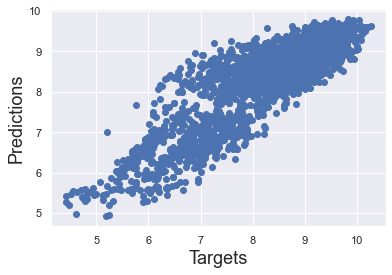

In [302]:
# Comparing the predicted values with the targets values
# The closer it is to the 45 degree slope line, the more accurate it is
plt.scatter(targets, predicted)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)

plt.show()

### Finding the weights and bias

In [340]:
reg.intercept_

5.84062011293037

In [341]:
reg.coef_

array([ 1.07223450e-02,  1.95059973e+00,  6.93052118e-03,  1.34867767e+00,
        1.52501514e-02, -9.85982398e-02, -1.58870072e-01, -1.23800251e+00,
       -1.84603249e-01, -2.12151976e-01, -1.60490777e-01, -1.22598370e-01,
       -7.54751022e-02, -2.32761679e-01, -5.40121398e-02, -1.31768307e-01,
        2.72238119e-01, -1.18992875e-01, -1.32759420e-01,  2.46095549e-02,
        7.15384620e-02, -4.41411293e-02, -4.40161020e-01, -5.43811852e-02,
       -2.06144634e-01, -7.65058081e-04, -6.35988753e-02, -8.86172751e-06,
       -4.57580028e-03,  1.29879910e-03,  2.27286857e-02,  3.48269204e-02,
        3.66383566e-02,  2.14588372e-02,  7.57037876e-03,  2.12868998e-02,
        1.75054783e-02,  3.06222623e-02,  2.45765763e-02,  8.28834069e-03,
       -5.41594068e-04, -2.37397511e-02,  3.71307722e-02,  2.20443457e-02,
        4.57701253e-03,  1.88190618e-02,  6.76016246e-04, -1.94731580e-03,
        9.93985427e-03,  3.52289359e-03,  5.17271460e-01,  1.95471086e-03,
       -4.94921283e-01, -

In [223]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

ValueError: Length of values does not match length of index

## Testing

In [366]:
test_raw_data = pd.read_csv('test.csv')
test_raw_data.head()

Product_Identifier Supermarket_Identifier Product_Supermarket_Identifier  \
0              FDC15            CHUKWUDI049              FDC15_CHUKWUDI049   
1              NCY06            CHUKWUDI018              NCY06_CHUKWUDI018   
2              DRB24            CHUKWUDI035              DRB24_CHUKWUDI035   
3              NCG54            CHUKWUDI018              NCG54_CHUKWUDI018   
4              NCA42            CHUKWUDI017              NCA42_CHUKWUDI017   

   Product_Weight Product_Fat_Content  Product_Shelf_Visibility Product_Type  \
0          18.100             Low Fat                  0.178246        Dairy   
1          15.250             Low Fat                  0.061434    Household   
2           8.785             Low Fat                  0.020573  Soft Drinks   
3          12.100             Low Fat                  0.080131    Household   
4           6.965             Low Fat                  0.028710    Household   

   Product_Price  Supermarket_Opening_Year Supermarket _Size  \
0         395.32                      2006            Medium   
1         327.49                      2016            Medium   
2         391.16                      2011             Small   
3         427.28                      2016            Medium   
4         395.40                      2014               NaN   

  Supermarket_Location_Type   Supermarket_Type  
0                 Cluster 1  Supermarket Type1  
1                 Cluster 3  Supermarket Type2  
2                 Cluster 2  Supermarket Type1  
3                 Cluster 3  Supermarket Type2  
4                 Cluster 2  Supermarket Type1

In [308]:
test_first_data.describe(include='all')

Product_Identifier Supermarket_Identifier  \
count                1248                   1248   
unique                815                     10   
top                 FDA47            CHUKWUDI049   
freq                    5                    169   
mean                  NaN                    NaN   
std                   NaN                    NaN   
min                   NaN                    NaN   
25%                   NaN                    NaN   
50%                   NaN                    NaN   
75%                   NaN                    NaN   
max                   NaN                    NaN   

       Product_Supermarket_Identifier  Product_Weight Product_Fat_Content  \
count                            1248     1047.000000                1248   
unique                           1248             NaN                   3   
top                 FDK60_CHUKWUDI049             NaN             Low Fat   
freq                                1             NaN                 767   
mean                              NaN       13.023434                 NaN   
std                               NaN        4.621107                 NaN   
min                               NaN        4.555000                 NaN   
25%                               NaN        8.985000                 NaN   
50%                               NaN       12.850000                 NaN   
75%                               NaN       17.000000                 NaN   
max                               NaN       21.250000                 NaN   

        Product_Shelf_Visibility Product_Type  Product_Price  \
count                1248.000000         1248    1248.000000   
unique                       NaN           16            NaN   
top                          NaN  Snack Foods            NaN   
freq                         NaN          195            NaN   
mean                    0.067825          NaN     391.769255   
std                     0.053390          NaN     116.914230   
min                     0.000000          NaN      84.220000   
25%                     0.028697          NaN     307.700000   
50%                     0.053678          NaN     392.990000   
75%                     0.096293          NaN     459.280000   
max                     0.325781          NaN     664.220000   

        Supermarket_Opening_Year Supermarket _Size Supermarket_Location_Type  \
count                1248.000000               924                      1248   
unique                       NaN                 3                         3   
top                          NaN            Medium                 Cluster 3   
freq                         NaN               427                       502   
mean                 2004.798878               NaN                       NaN   
std                     8.305732               NaN                       NaN   
min                  1992.000000               NaN                       NaN   
25%                  1994.000000               NaN                       NaN   
50%                  2006.000000               NaN                       NaN   
75%                  2011.000000               NaN                       NaN   
max                  2016.000000               NaN                       NaN   

         Supermarket_Type  
count                1248  
unique                  4  
top     Supermarket Type1  
freq                  809  
mean                  NaN  
std                   NaN  
min                   NaN  
25%                   NaN  
50%                   NaN  
75%                   NaN  
max                   NaN

### Fill in all missing values

In [312]:
#replacing null values of 'Product_Weight' with their values of corresponding means of 'Product_Fat_Content'
test_low_fat = test_first_data['Product_Fat_Content'] == 'Low Fat'
test_normal_fat = test_first_data['Product_Fat_Content'] == 'Normal Fat'
test_ultra_low_fat = test_first_data['Product_Fat_Content'] == 'Ultra Low fat'

test_first_data.loc[test_low_fat, 'Product_Weight'] = test_first_data.loc[test_low_fat, 'Product_Weight'].fillna(test_first_data.loc[test_low_fat, 'Product_Weight'].mean())
test_first_data.loc[test_normal_fat, 'Product_Weight'] = test_first_data.loc[test_normal_fat, 'Product_Weight'].fillna(test_first_data.loc[test_normal_fat, 'Product_Weight'].mean())
test_first_data.loc[test_ultra_low_fat, 'Product_Weight'] = test_first_data.loc[test_ultra_low_fat, 'Product_Weight'].fillna(test_first_data.loc[test_ultra_low_fat, 'Product_Weight'].mean())

In [367]:
test_raw_data['Product_Weight'].fillna(np.mean(test_raw_data['Product_Weight']),inplace = True)
test_raw_data.describe()

Product_Weight  Product_Shelf_Visibility  Product_Price  \
count     1248.000000               1248.000000    1248.000000   
mean        13.023434                  0.067825     391.769255   
std          4.232321                  0.053390     116.914230   
min          4.555000                  0.000000      84.220000   
25%          9.600000                  0.028697     307.700000   
50%         13.023434                  0.053678     392.990000   
75%         16.200000                  0.096293     459.280000   
max         21.250000                  0.325781     664.220000   

       Supermarket_Opening_Year  
count               1248.000000  
mean                2004.798878  
std                    8.305732  
min                 1992.000000  
25%                 1994.000000  
50%                 2006.000000  
75%                 2011.000000  
max                 2016.000000

In [368]:
test_raw_data['Supermarket _Size'].fillna("Medium",inplace = True)
test_raw_data.describe(include='all')

Product_Identifier Supermarket_Identifier  \
count                1248                   1248   
unique                815                     10   
top                 FDA47            CHUKWUDI049   
freq                    5                    169   
mean                  NaN                    NaN   
std                   NaN                    NaN   
min                   NaN                    NaN   
25%                   NaN                    NaN   
50%                   NaN                    NaN   
75%                   NaN                    NaN   
max                   NaN                    NaN   

       Product_Supermarket_Identifier  Product_Weight Product_Fat_Content  \
count                            1248     1248.000000                1248   
unique                           1248             NaN                   3   
top                 FDK60_CHUKWUDI049             NaN             Low Fat   
freq                                1             NaN                 767   
mean                              NaN       13.023434                 NaN   
std                               NaN        4.232321                 NaN   
min                               NaN        4.555000                 NaN   
25%                               NaN        9.600000                 NaN   
50%                               NaN       13.023434                 NaN   
75%                               NaN       16.200000                 NaN   
max                               NaN       21.250000                 NaN   

        Product_Shelf_Visibility Product_Type  Product_Price  \
count                1248.000000         1248    1248.000000   
unique                       NaN           16            NaN   
top                          NaN  Snack Foods            NaN   
freq                         NaN          195            NaN   
mean                    0.067825          NaN     391.769255   
std                     0.053390          NaN     116.914230   
min                     0.000000          NaN      84.220000   
25%                     0.028697          NaN     307.700000   
50%                     0.053678          NaN     392.990000   
75%                     0.096293          NaN     459.280000   
max                     0.325781          NaN     664.220000   

        Supermarket_Opening_Year Supermarket _Size Supermarket_Location_Type  \
count                1248.000000              1248                      1248   
unique                       NaN                 3                         3   
top                          NaN            Medium                 Cluster 3   
freq                         NaN               751                       502   
mean                 2004.798878               NaN                       NaN   
std                     8.305732               NaN                       NaN   
min                  1992.000000               NaN                       NaN   
25%                  1994.000000               NaN                       NaN   
50%                  2006.000000               NaN                       NaN   
75%                  2011.000000               NaN                       NaN   
max                  2016.000000               NaN                       NaN   

         Supermarket_Type  
count                1248  
unique                  4  
top     Supermarket Type1  
freq                  809  
mean                  NaN  
std                   NaN  
min                   NaN  
25%                   NaN  
50%                   NaN  
75%                   NaN  
max                   NaN

In [369]:
identifier = test_raw_data['Product_Supermarket_Identifier']
identifier

0       FDC15_CHUKWUDI049
1       NCY06_CHUKWUDI018
2       DRB24_CHUKWUDI035
3       NCG54_CHUKWUDI018
4       NCA42_CHUKWUDI017
              ...        
1243    FDW39_CHUKWUDI018
1244    FDB40_CHUKWUDI018
1245    FDX32_CHUKWUDI018
1246    FDX37_CHUKWUDI049
1247    FDZ35_CHUKWUDI049
Name: Product_Supermarket_Identifier, Length: 1248, dtype: object

In [370]:
# Drop values that are not needed
test_raw_drop = test_raw_data.drop(['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier'],axis=1)
test_raw_drop.head()

Product_Weight Product_Fat_Content  Product_Shelf_Visibility Product_Type  \
0          18.100             Low Fat                  0.178246        Dairy   
1          15.250             Low Fat                  0.061434    Household   
2           8.785             Low Fat                  0.020573  Soft Drinks   
3          12.100             Low Fat                  0.080131    Household   
4           6.965             Low Fat                  0.028710    Household   

   Product_Price  Supermarket_Opening_Year Supermarket _Size  \
0         395.32                      2006            Medium   
1         327.49                      2016            Medium   
2         391.16                      2011             Small   
3         427.28                      2016            Medium   
4         395.40                      2014            Medium   

  Supermarket_Location_Type   Supermarket_Type  
0                 Cluster 1  Supermarket Type1  
1                 Cluster 3  Supermarket Type2  
2                 Cluster 2  Supermarket Type1  
3                 Cluster 3  Supermarket Type2  
4                 Cluster 2  Supermarket Type1

In [371]:
test_raw_drop['Supermarket_Type'] = labelencoder.fit_transform(test_raw_drop['Supermarket_Type'])
test_raw_drop

Product_Weight Product_Fat_Content  Product_Shelf_Visibility  \
0             18.100             Low Fat                  0.178246   
1             15.250             Low Fat                  0.061434   
2              8.785             Low Fat                  0.020573   
3             12.100             Low Fat                  0.080131   
4              6.965             Low Fat                  0.028710   
...              ...                 ...                       ...   
1243           6.690          Normal Fat                  0.037061   
1244          17.500          Normal Fat                  0.007571   
1245          15.100          Normal Fat                  0.100265   
1246          16.200             Low Fat                  0.063127   
1247           9.600          Normal Fat                  0.000000   

               Product_Type  Product_Price  Supermarket_Opening_Year  \
0                     Dairy         395.32                      2006   
1                 Household         327.49                      2016   
2               Soft Drinks         391.16                      2011   
3                 Household         427.28                      2016   
4                 Household         395.40                      2014   
...                     ...            ...                       ...   
1243                   Meat         442.09                      2016   
1244                  Dairy         361.53                      2016   
1245  Fruits and Vegetables         356.45                      2016   
1246                 Canned         251.18                      2006   
1247                 Breads         254.25                      2006   

     Supermarket _Size Supermarket_Location_Type  Supermarket_Type  
0               Medium                 Cluster 1                 1  
1               Medium                 Cluster 3                 2  
2                Small                 Cluster 2                 1  
3               Medium                 Cluster 3                 2  
4               Medium                 Cluster 2                 1  
...                ...                       ...               ...  
1243            Medium                 Cluster 3                 2  
1244            Medium                 Cluster 3                 2  
1245            Medium                 Cluster 3                 2  
1246            Medium                 Cluster 1                 1  
1247            Medium                 Cluster 1                 1  

[1248 rows x 9 columns]

In [372]:
test_data_with_dummies = pd.get_dummies(test_raw_drop, drop_first=True)
test_data_with_dummies

Product_Weight  Product_Shelf_Visibility  Product_Price  \
0             18.100                  0.178246         395.32   
1             15.250                  0.061434         327.49   
2              8.785                  0.020573         391.16   
3             12.100                  0.080131         427.28   
4              6.965                  0.028710         395.40   
...              ...                       ...            ...   
1243           6.690                  0.037061         442.09   
1244          17.500                  0.007571         361.53   
1245          15.100                  0.100265         356.45   
1246          16.200                  0.063127         251.18   
1247           9.600                  0.000000         254.25   

      Supermarket_Opening_Year  Supermarket_Type  \
0                         2006                 1   
1                         2016                 2   
2                         2011                 1   
3                         2016                 2   
4                         2014                 1   
...                        ...               ...   
1243                      2016                 2   
1244                      2016                 2   
1245                      2016                 2   
1246                      2006                 1   
1247                      2006                 1   

      Product_Fat_Content_Normal Fat  Product_Fat_Content_Ultra Low fat  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   
...                              ...                                ...   
1243                               1                                  0   
1244                               1                                  0   
1245                               1                                  0   
1246                               0                                  0   
1247                               1                                  0   

      Product_Type_Breads  Product_Type_Breakfast  Product_Type_Canned  ...  \
0                       0                       0                    0  ...   
1                       0                       0                    0  ...   
2                       0                       0                    0  ...   
3                       0                       0                    0  ...   
4                       0                       0                    0  ...   
...                   ...                     ...                  ...  ...   
1243                    0                       0                    0  ...   
1244                    0                       0                    0  ...   
1245                    0                       0                    0  ...   
1246                    0                       0                    1  ...   
1247                    1                       0                    0  ...   

      Product_Type_Meat  Product_Type_Others  Product_Type_Seafood  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   
...                 ...                  ...                   ...   
1243                  1                    0                     0   
1244                  0                    0                     0   
1245                  0                    0                     0   
1246                  0                    0      

In [373]:
test_data_complete = test_data_with_dummies.drop(['Supermarket_Opening_Year'],axis=1)

In [319]:
test_data_complete.columns.values

array(['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Type', 'Product_Fat_Content_Normal Fat',
       'Product_Fat_Content_Ultra Low fat', 'Product_Type_Breads',
       'Product_Type_Breakfast', 'Product_Type_Canned',
       'Product_Type_Dairy', 'Product_Type_Frozen Foods',
       'Product_Type_Fruits and Vegetables', 'Product_Type_Hard Drinks',
       'Product_Type_Health and Hygiene', 'Product_Type_Household',
       'Product_Type_Meat', 'Product_Type_Others', 'Product_Type_Seafood',
       'Product_Type_Snack Foods', 'Product_Type_Soft Drinks',
       'Product_Type_Starchy Foods', 'Supermarket _Size_Medium',
       'Supermarket _Size_Small', 'Supermarket_Location_Type_Cluster 2',
       'Supermarket_Location_Type_Cluster 3'], dtype=object)

In [320]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(test_data_complete)

StandardScaler()

In [374]:
test_data_complete.describe(include='all')

Product_Weight  Product_Shelf_Visibility  Product_Price  \
count     1248.000000               1248.000000    1248.000000   
mean        13.023434                  0.067825     391.769255   
std          4.232321                  0.053390     116.914230   
min          4.555000                  0.000000      84.220000   
25%          9.600000                  0.028697     307.700000   
50%         13.023434                  0.053678     392.990000   
75%         16.200000                  0.096293     459.280000   
max         21.250000                  0.325781     664.220000   

       Supermarket_Type  Product_Fat_Content_Normal Fat  \
count       1248.000000                     1248.000000   
mean           1.154647                        0.346154   
std            0.779217                        0.475934   
min            0.000000                        0.000000   
25%            1.000000                        0.000000   
50%            1.000000                        0.000000   
75%            1.000000                        1.000000   
max            3.000000                        1.000000   

       Product_Fat_Content_Ultra Low fat  Product_Type_Breads  \
count                        1248.000000          1248.000000   
mean                            0.039263             0.017628   
std                             0.194297             0.131649   
min                             0.000000             0.000000   
25%                             0.000000             0.000000   
50%                             0.000000             0.000000   
75%                             0.000000             0.000000   
max                             1.000000             1.000000   

       Product_Type_Breakfast  Product_Type_Canned  Product_Type_Dairy  ...  \
count             1248.000000          1248.000000         1248.000000  ...   
mean                 0.009615             0.065705            0.069712  ...   
std                  0.097625             0.247865            0.254762  ...   
min                  0.000000             0.000000            0.000000  ...   
25%                  0.000000             0.000000            0.000000  ...   
50%                  0.000000             0.000000            0.000000  ...   
75%                  0.000000             0.000000            0.000000  ...   
max                  1.000000             1.000000            1.000000  ...   

       Product_Type_Meat  Product_Type_Others  Product_Type_Seafood  \
count        1248.000000          1248.000000           1248.000000   
mean            0.049679             0.014423              0.007212   
std             0.217369             0.119275              0.084648   
min             0.000000             0.000000              0.000000   
25%             0.000000             0.000000              0.000000   
50%             0.000000             0.000000              0.000000   
75%             0.000000             0.000000              0.000000   
max             1.000000             1.000000              1.000000   

       Product_Type_Snack Foods  Product_Type_Soft Drinks  \
count               1248.000000               1248.000000   
mean                   0.156250                  0.054487   
std                    0.363238                  0.227067   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       Product_Type_Starchy Foods  Supermarket _Size_Medium  \
count                 1248.000000               1248.000000   
mean                     0.015224                  0.601763   
std                      0.122493                  0.489731   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%           

In [322]:
test_inputs_scaled = scaler.transform(test_data_complete)

In [323]:
test_inputs_scaled

array([[ 1.19998777,  2.06902638,  0.03038269, ..., -0.6230643 ,
        -0.65040992, -0.82031838],
       [ 0.52641523, -0.119744  , -0.55001879, ..., -0.6230643 ,
        -0.65040992,  1.21903887],
       [-1.00153089, -0.88537543, -0.00521322, ...,  1.60497079,
         1.53749192, -0.82031838],
       ...,
       [ 0.49096405,  0.6078552 , -0.30221654, ..., -0.6230643 ,
        -0.65040992,  1.21903887],
       [ 0.75093941, -0.08801585, -1.20298115, ..., -0.6230643 ,
        -0.65040992, -0.82031838],
       [-0.80891277, -1.27087023, -1.17671206, ..., -0.6230643 ,
        -0.65040992, -0.82031838]])

In [324]:
sales_predicted = reg.predict(poly_features.fit_transform(test_data_complete))

In [375]:
y_pred = sum(tree.predict(test_data_complete) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [325]:
test_predicted = reg.predict(poly_features.fit_transform(test_inputs_scaled))

In [376]:
df_pf = pd.DataFrame(identifier, columns=['Product_Supermarket_Identifier'])
df_pf['Product_Supermarket_Sales'] = np.exp(y_pred)
df_pf

Product_Supermarket_Identifier  Product_Supermarket_Sales
0                 FDC15_CHUKWUDI049                6436.323660
1                 NCY06_CHUKWUDI018                3787.010691
2                 DRB24_CHUKWUDI035                6436.323660
3                 NCG54_CHUKWUDI018                6436.323660
4                 NCA42_CHUKWUDI017                6436.323660
...                             ...                        ...
1243              FDW39_CHUKWUDI018                6436.323660
1244              FDB40_CHUKWUDI018                6436.323660
1245              FDX32_CHUKWUDI018                3787.010691
1246              FDX37_CHUKWUDI049                3787.010691
1247              FDZ35_CHUKWUDI049                3787.010691

[1248 rows x 2 columns]

In [377]:
df_pf.to_csv('olayinka_dsn_july_challenge.csv', index=False)